<a href="https://colab.research.google.com/github/MarcoFidelVasquezRivera/K-nearest-Neighbour/blob/Marco/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import sklearn #se importa para obtener un dataset
import matplotlib.pyplot as plt#se importa para poder realizar la gráfica con los datos

from sklearn import datasets
#obtiene los datos desde iris
iris = datasets.load_iris()

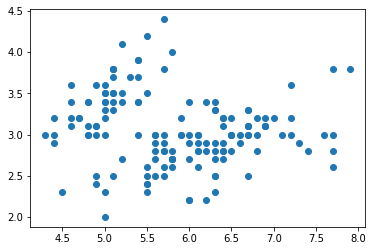

In [3]:
X = iris.data[:, :2]
Y = iris.target
plt.scatter(X[:,0],X[:,1])

In [15]:
import math
#definimos la clase KNN
class KNN:

  def __init__(self,k):
    self.k = k

  def euclidean_distance(self, idx1, idx2, data, axis=0):
    """    Returns the euclidean distance between x and y.

            Preconditions:
                    the dimensions of x and y must be the same

            Parameters:
                    x (n-dimensional numpy array): an array of integers
                    y (n-dimensional numpy array): an array of integers
                    axis (int): axis in which we are working

            Returns:
                    int): distance between x and y on the axis axis.
    """
    return np.linalg.norm( data[idx1] - data[idx2], axis=axis)

  def get_k_nearest_neighboors(self, idx, data):
        """
        Returns the K nearest neighboors of the point.

        Preconditions:
                the dimensions of point and the points on data must be the same

        Parameters:
                idx (int): the index of the point which we are going to get the distance with the other points
                data: an n-dimensional numpy array
        Postcondition:
                the distance of this point to itself is not going to be returned
        Returns:
                response (int): an array with the indexes of the k nearest neighboors of the point with index idx.
        """
        # Calculate the distances from datapoint in idx with every other datapoint in data 
        distances = np.array([  self.euclidean_distance(idx, i, data) for i in range(len(data)) ])
        # Maps from distance to the index in data excluding idx
        index_distance = dict((distance, index) for index, distance in enumerate(distances) if index != idx)
        distances = np.delete(distances, idx)
        distances.sort()
        top_k_nearest_neighbors = np.array([ index_distance[distance] for distance in distances])
        response = []

        i = 0
        # This ensures that only non-duplicate indexes are returned
        while len(response) < self.k:
          kth_nearest = top_k_nearest_neighbors[i]
          if kth_nearest not in response:
            response.append(kth_nearest)
          i+=1
        return np.array(response)

  def set_point_target(self,indexes,target_data):
    """
    Returns the the most frequent class among the k nearest neightbors.

    Preconditions:
      The k nearest neightbors must have been found.
    Parameters:
      idexes (int): the indexes of the k neares neightbors
      target_data (int): a list of the classes of every point
    Returns:
      classfreq (int): the most frequent class among the k nearest neightbors
    """
    #falta hacer la documentación
    frequency = dict((k,0) for k in target_data)

    for index in indexes:
      result = target_data[index]
      frequency[result]+=1
    
    most_freq = -1
    classfreq = -1
    for clas,freq in frequency.items():
      if freq > most_freq:
        most_freq = freq
        classfreq = clas

    return classfreq

    # fit
  def fit(self, X, targets):
    """
    trains the model using a dataset.

    Preconditions:
      the length of the dataset and the targets must be the same.

    Parameters:
      X : the dataset with all the points to train the model
      targets: a list of the classes of every point
    Postcondition:
      the model is trained and ready to predict with a good hit rate
    """
    # k 
    self.data = X
    self.index_to_class = {} # inicializa un arreglo que mapea, desde los indixes
    for datapoint_idx in range(len(X)):
      k_nearest = self.get_k_nearest_neighboors(datapoint_idx,self.data)
      classfreq = self.set_point_target(k_nearest,targets)
      self.index_to_class[datapoint_idx] = classfreq
    self.targets = targets

  def predict(self,datapoint):
    """
    Predict the classes for points it gets as input.

    Preconditions:
      the fitmethod must have been run at least once
    Parameters:
      datapoint : A list with all the points which their class will be predicted
    Returns:
      predictions : the class fredicted for each point
    """
    predictions = []
    if datapoint.shape[-1]==self.data.shape[-1]:


      for datapoint_idx in range(len(datapoint)):
        expanded_i_datapoint = np.expand_dims(datapoint[datapoint_idx],0)
        matrix = np.concatenate((self.data,expanded_i_datapoint),0)
        k_nearest = self.get_k_nearest_neighboors(matrix.shape[0]-1,matrix)
        classfreq = self.set_point_target(k_nearest,self.targets)
        predictions.append(classfreq)
    return np.array(predictions)



In [16]:
n_train_samples = int((X.shape[0])*0.8)
random_indexes = np.arange(X.shape[0]-1)
np.random.shuffle(random_indexes)

indexes_train = random_indexes[:n_train_samples]
indexes_test = random_indexes[n_train_samples:]
#se sacan los datos para entrenar y para probar el algoritmo
x_train = X[indexes_train]
x_test = X[indexes_test]

y_train = Y[indexes_train]
y_test = Y[indexes_test]

In [17]:
#lo probamos haciendo uso de la base de datos cargada anteriormente
knn = KNN(30)
knn.fit(x_train,y_train)

In [18]:
y_hat = knn.predict(x_test)

In [19]:
n_correct = (y_hat==y_test).sum()
correct_ratio = n_correct/len(y_test)
correct_ratio

0.7931034482758621

In [20]:
def get_accuracy(k):
  knn = KNN(k)
  knn.fit(x_train,y_train)
  y_hat = knn.predict(x_test)
  n_correct = (y_hat==y_test).sum()
  correct_ratio = n_correct/len(y_test)
  return correct_ratio

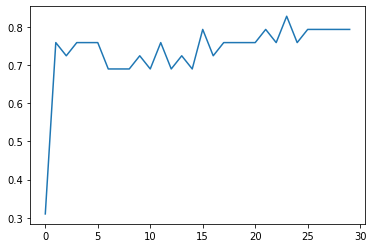

In [21]:
n_k = np.arange(30)
accuracies = [get_accuracy(k) for k in n_k]
plt.plot(n_k,accuracies)